In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
def compute_metrics(X, k_values, random_state=42):
    wcss = []
    sil = []
    ch = []
    db = []
    for k in k_values:
        km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = km.fit_predict(X)
        wcss.append(km.inertia_)
        sil.append(silhouette_score(X, labels))
        ch.append(calinski_harabasz_score(X, labels))
        db.append(davies_bouldin_score(X, labels))
    return np.array(wcss), np.array(sil), np.array(ch), np.array(db)

In [3]:
X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=42)

In [4]:
k_values = list(range(2, 11))
wcss, sil, ch, db = compute_metrics(X, k_values)

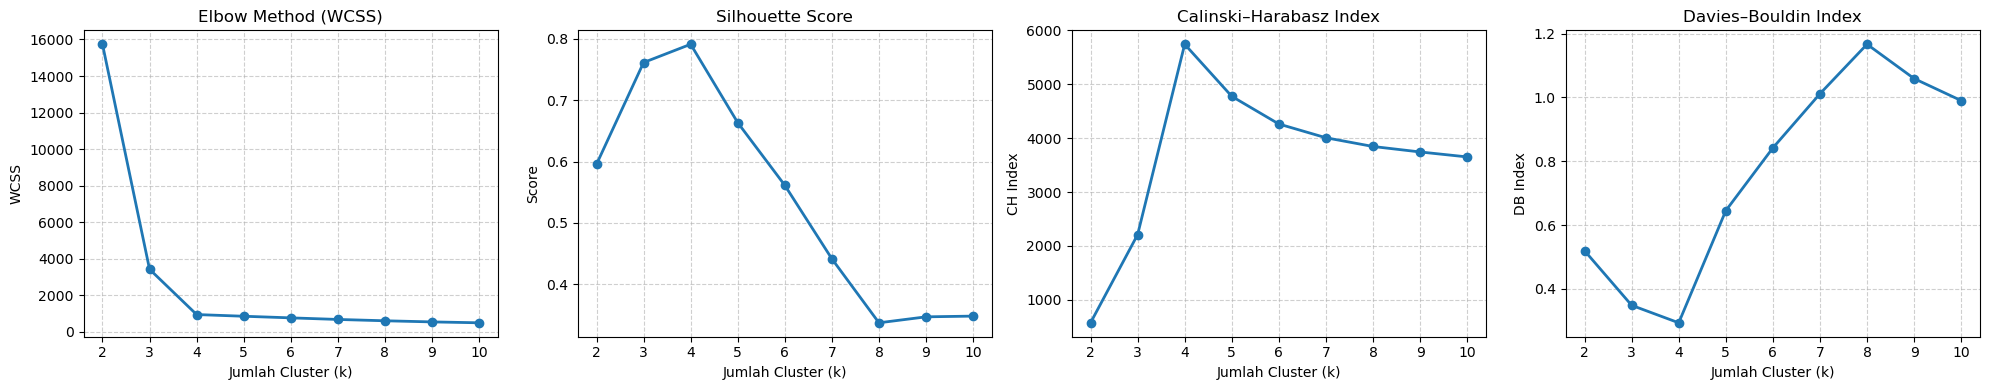

In [9]:
plt.figure(figsize=(20, 4))

# Elbow Method (WCSS): lower is better, look for the "elbow"
ax1 = plt.subplot(1, 4, 1)
ax1.plot(k_values, wcss, marker='o', linewidth=2)
ax1.set_title("Elbow Method (WCSS)")
ax1.set_xlabel("Jumlah Cluster (k)")
ax1.set_ylabel("WCSS")
ax1.grid(True, linestyle='--', alpha=0.6)


# Silhouette Score: higher is better
ax2 = plt.subplot(1, 4, 2)
ax2.plot(k_values, sil, marker='o', linewidth=2)
ax2.set_title("Silhouette Score")
ax2.set_xlabel("Jumlah Cluster (k)")
ax2.set_ylabel("Score")
ax2.grid(True, linestyle='--', alpha=0.6)

# Calinski–Harabasz Index: higher is better
ax3 = plt.subplot(1, 4, 3)
ax3.plot(k_values, ch, marker='o', linewidth=2)
ax3.set_title("Calinski–Harabasz Index")
ax3.set_xlabel("Jumlah Cluster (k)")
ax3.set_ylabel("CH Index")
ax3.grid(True, linestyle='--', alpha=0.6)

# Davies–Bouldin Index: lower is better
ax4 = plt.subplot(1, 4, 4)
ax4.plot(k_values, db, marker='o', linewidth=2)
ax4.set_title("Davies–Bouldin Index")
ax4.set_xlabel("Jumlah Cluster (k)")
ax4.set_ylabel("DB Index")
ax4.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()